<a href="https://colab.research.google.com/github/nadilabenedito/challenge_data_science/blob/main/Challenge_Alura_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHALLENDE ALURA - DATA SCIENCE**

A empresa de telecomunicações Alura Voz quer reduzir a **Taxa de Evasão de Clientes**, ou **Churn Rate**.

Como passo inicial, é preciso **identificar os clientes que teriam uma maior chance de deixar a empresa**. Para isso, é interessante investigar algumas características de clientes ou dos planos de clientes para tentar **CLASSIFICAR** estas pessoas como potenciais candidatas a deixar a empresa ou não.

**Dicionário de dados**

**customerID:** número de identificação único de cada cliente

**Churn:** se o cliente deixou ou não a empresa

**gender:** gênero (masculino e feminino)

**SeniorCitizen:** informação sobre um cliente ter ou não idade igual ou maior que 65 anos

**Partner:** se o cliente possui ou não um parceiro ou parceira

**Dependents:** se o cliente possui ou não dependentes

**tenure:** meses de contrato do cliente

**PhoneService:** assinatura de serviço telefônico

**MultipleLines:** assisnatura de mais de uma linha de telefone

**InternetService:** assinatura de um provedor internet

**OnlineSecurity:** assinatura adicional de segurança online

**OnlineBackup:** assinatura adicional de backup online

**DeviceProtection:** assinatura adicional de proteção no dispositivo

**TechSupport:** assinatura adicional de suporte técnico, menos tempo de espera

**StreamingTV:** assinatura de TV a cabo

**StreamingMovies:** assinatura de streaming de filmes

**Contract:** tipo de contrato

**PaperlessBilling:** se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

**Charges.Monthly:** total de todos os serviços do cliente por mês

**Charges.Total:** total gasto pelo cliente

In [1]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

O primeiro passo é visualizar os dados e organizar de uma forma que possibilite a manipulação.

In [2]:
dados = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


É preciso extrair os dados em JASON para acessar as informações dos clientes, nas colunas 'customer', 'phone', 'internet' e 'account'.

In [4]:
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [7]:
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [8]:
dados.drop(columns=['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

Inserindo os dados em um mesmo DataFrame.

In [9]:
dados_extraidos = pd.concat([dados, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_extraidos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [10]:
dados_extraidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Renomeando colunas.

In [11]:
columns = {'customerID':'cliente_id', 'Churn':'cliente_saida', 'gender':'genero', 
           'SeniorCitizen':'idoso', 'Partner':'parceiro', 
           'Dependents':'dependentes', 'tenure':'meses_contrato',
           'PhoneService':'servico_telefonia', 'MultipleLines':'multiplas_linhas_telefonicas', 
           'InternetService':'servico_internet', 'OnlineSecurity':'seguranca_online', 
           'OnlineBackup':'backup_online', 'DeviceProtection': 'protecao_de_dispositivo', 
           'TechSupport':'suporte_tecnico', 'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_filmes', 
           'Contract':'tipo_contrato', 'PaperlessBilling':'fatura_digital', 'PaymentMethod':'metodo_pagamento',
           'Charges.Monthly':'cobrancas_mensais', 'Charges.Total':'total_cobrancas'}

In [12]:
dados_extraidos.rename(columns=columns, inplace=True)

In [13]:
dados_extraidos.sample(10)

,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,backup_online,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas
6291,8649-VYTUC,,Male,0,No,No,24,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.35,2238.5
6080,8311-UEUAB,No,Female,0,Yes,Yes,67,Yes,Yes,DSL,...,No,No,No,Yes,Yes,Two year,Yes,Electronic check,75.50,5229.45
3782,5186-SAMNZ,Yes,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.50,69.5
1481,2123-VSCOT,No,Female,0,Yes,Yes,59,Yes,Yes,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),72.10,4194.85
4019,5498-TXHLF,Yes,Female,0,Yes,Yes,34,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,87.45,2874.15
4400,6024-RUGGH,No,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.20,1798.9
1517,2183-ZULVZ,,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.15,8250
5168,7054-ENNGU,No,Female,0,Yes,No,9,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,50.85,466.6
5953,8132-YPVBX,No,Female,0,No,No,6,Yes,No,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,85.95,514.6
5250,7159-NOKYQ,No,Male,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,93.15,6368.2


Verificando se há dados nulos ou espaços vazios.

In [14]:
dados_extraidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cliente_id                    7267 non-null   object 
 1   cliente_saida                 7267 non-null   object 
 2   genero                        7267 non-null   object 
 3   idoso                         7267 non-null   int64  
 4   parceiro                      7267 non-null   object 
 5   dependentes                   7267 non-null   object 
 6   meses_contrato                7267 non-null   int64  
 7   servico_telefonia             7267 non-null   object 
 8   multiplas_linhas_telefonicas  7267 non-null   object 
 9   servico_internet              7267 non-null   object 
 10  seguranca_online              7267 non-null   object 
 11  backup_online                 7267 non-null   object 
 12  protecao_de_dispositivo       7267 non-null   object 
 13  sup

In [15]:
dados_extraidos.isnull().sum()

cliente_id                      0
cliente_saida                   0
genero                          0
idoso                           0
parceiro                        0
dependentes                     0
meses_contrato                  0
servico_telefonia               0
multiplas_linhas_telefonicas    0
servico_internet                0
seguranca_online                0
backup_online                   0
protecao_de_dispositivo         0
suporte_tecnico                 0
streaming_tv                    0
streaming_filmes                0
tipo_contrato                   0
fatura_digital                  0
metodo_pagamento                0
cobrancas_mensais               0
total_cobrancas                 0
dtype: int64

In [16]:
dados_extraidos[dados_extraidos == ' '].count()

cliente_id                       0
cliente_saida                    0
genero                           0
idoso                            0
parceiro                         0
dependentes                      0
meses_contrato                   0
servico_telefonia                0
multiplas_linhas_telefonicas     0
servico_internet                 0
seguranca_online                 0
backup_online                    0
protecao_de_dispositivo          0
suporte_tecnico                  0
streaming_tv                     0
streaming_filmes                 0
tipo_contrato                    0
fatura_digital                   0
metodo_pagamento                 0
cobrancas_mensais                0
total_cobrancas                 11
dtype: int64

In [17]:
dados_extraidos[dados_extraidos == ''].count()

cliente_id                        0
cliente_saida                   224
genero                            0
idoso                             0
parceiro                          0
dependentes                       0
meses_contrato                    0
servico_telefonia                 0
multiplas_linhas_telefonicas      0
servico_internet                  0
seguranca_online                  0
backup_online                     0
protecao_de_dispositivo           0
suporte_tecnico                   0
streaming_tv                      0
streaming_filmes                  0
tipo_contrato                     0
fatura_digital                    0
metodo_pagamento                  0
cobrancas_mensais                 0
total_cobrancas                   0
dtype: int64

Há campos vazios na "cliente_saida", para trabalhar esse dataset de forma efetiva para a extração de informação útil, será necessário limpar esses campos, visto que eles não alterarão os dados restantes, por ser um quantidade pequena dos dados (3.08%).

In [18]:
limpeza = dados_extraidos['cliente_saida'] != ''
dados_extraidos = dados_extraidos[limpeza]

In [19]:
dados_extraidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cliente_id                    7043 non-null   object 
 1   cliente_saida                 7043 non-null   object 
 2   genero                        7043 non-null   object 
 3   idoso                         7043 non-null   int64  
 4   parceiro                      7043 non-null   object 
 5   dependentes                   7043 non-null   object 
 6   meses_contrato                7043 non-null   int64  
 7   servico_telefonia             7043 non-null   object 
 8   multiplas_linhas_telefonicas  7043 non-null   object 
 9   servico_internet              7043 non-null   object 
 10  seguranca_online              7043 non-null   object 
 11  backup_online                 7043 non-null   object 
 12  protecao_de_dispositivo       7043 non-null   object 
 13  sup

Para ficar mais claro, vamos substituir a coluna "idoso" para "No ou Yes", ao invés de "0 ou 1".

In [20]:
dados_extraidos['idoso'] = dados_extraidos['idoso'].replace({0: 'No', 1: 'Yes'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
dados_extraidos.head()

,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,backup_online,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Inserindo contas diárias.

In [22]:
dados_extraidos['contas_diarias'] = round(dados_extraidos['cobrancas_mensais'] / 30, 2)
dados_extraidos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas,contas_diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


Transformando o arquivo em CSV para utilizar quando necessário.

**Analisando a variável target: Churn**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
porcentagem_churn = round(dados_extraidos.cliente_saida.value_counts(normalize=True)*100,2)
porcentagem_churn

No     73.46
Yes    26.54
Name: cliente_saida, dtype: float64

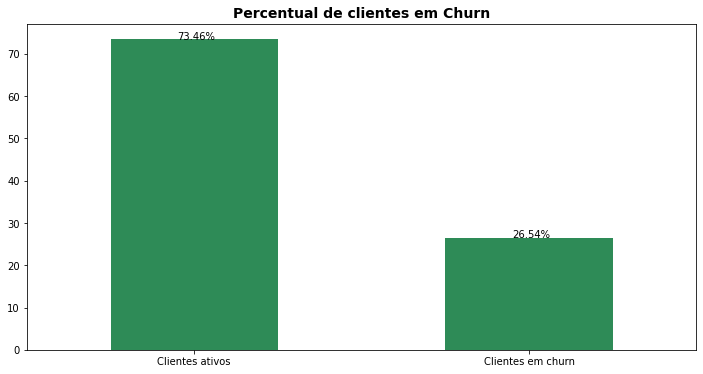

In [25]:
plt.figure(figsize = (12, 6))

labels = ['Clientes Ativos', 'Clientes em Churn']

ax = (dados_extraidos['cliente_saida'].value_counts(normalize=True)*100).plot(kind = 'bar', color = 'seagreen')
plt.title('Percentual de clientes em Churn', fontsize = 14, fontweight = 'bold')
ax.set_xticklabels(labels, rotation = 'horizontal')

for p in ax.patches:
  ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+.2, p.get_height()))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Clientes ativos'
labels[1] = 'Clientes em churn'
ax.set_xticklabels(labels)

plt.show()

O número de clientes que saem da empresa é consideravelmente alto, por isso é válido investigar o perfil desses clientes.

**Relação entre o churn e o tempo de contrato**

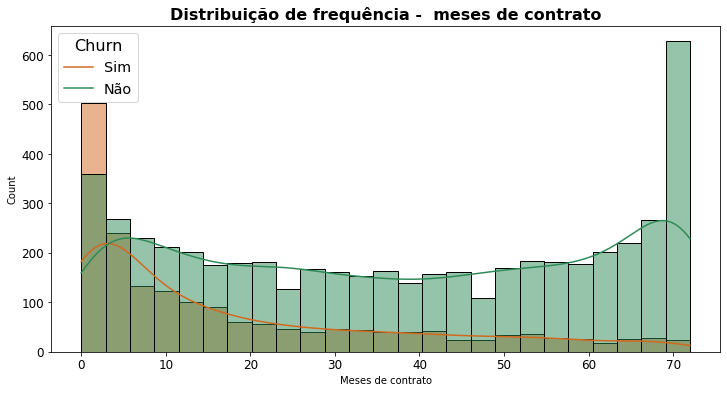

In [26]:
ax = sns.histplot(data = dados_extraidos, x = 'meses_contrato', kde = True, hue = 'cliente_saida', palette=['seagreen','chocolate'], bins=25)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência -  meses de contrato', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Meses de contrato')

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.legend(loc = 'best',  title = 'Churn', labels = ['Sim', 'Não'], title_fontsize = 16, fontsize = 'x-large')

plt.show()

A perda de clientes é maior nos primeiros meses de contrato.

**Relação entre o churn e o tipo de contrato**

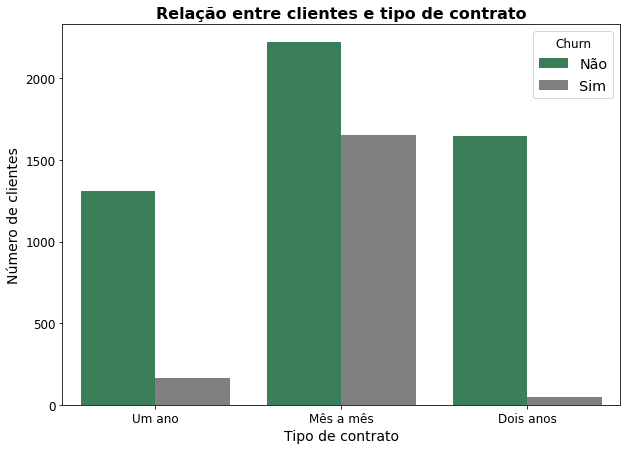

In [27]:
plt.figure(figsize = (10, 7))

ax = sns.countplot(data = dados_extraidos, x = 'tipo_contrato', hue = 'cliente_saida', palette = ['seagreen','gray'])
plt.title('Relação entre clientes e tipo de contrato', fontsize = 16, fontweight = 'bold')
plt.xlabel('Tipo de contrato', fontsize = 14)
plt.ylabel('Número de clientes',fontsize = 14)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Um ano'
labels[1] = 'Mês a mês'
labels[2] = 'Dois anos'
ax.set_xticklabels(labels)

plt.legend(loc = 'best',  title = 'Churn', labels = ['Não', 'Sim'], title_fontsize = 12, fontsize = 'x-large')

plt.show()

O tipo de contrato 'mês a mês' é o com maior número de churn, porém é o tipo de contrato com maior adesão de clientes.

**Relação entre o churn, o custo mensal e a idade**

Text(29.17493055555557, 0.5, 'Custo mensal')

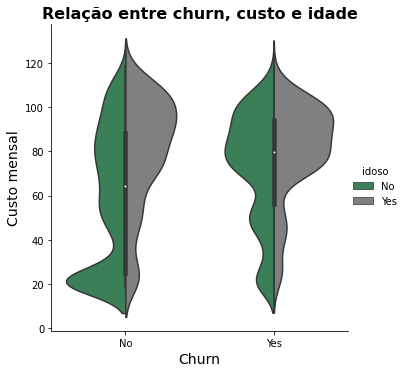

In [28]:
sns.catplot(data = dados_extraidos, x = 'cliente_saida', y = 'cobrancas_mensais', hue = 'idoso', kind = 'violin', split = True, palette = ['seagreen','gray'])

plt.title('Relação entre churn, custo e idade', fontsize = 16, fontweight = 'bold')
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Custo mensal',fontsize = 14)

Clientes idosos têm maior custo e são pouco mais de 1/4 da base de churn.

**Correlação entre as variáveis**

In [29]:
dados_extraidos.corr()

,meses_contrato,cobrancas_mensais,contas_diarias
meses_contrato,1.00000,0.247900,0.247910
cobrancas_mensais,0.24790,1.000000,0.999996
contas_diarias,0.24791,0.999996,1.000000


In [30]:
dados_extraidos.head()

,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas,contas_diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [31]:
dados_extraidos = dados_extraidos.replace({'No': 0, 'Yes': 1})
dados_extraidos.head()

,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [32]:
dados_extraidos.corr()

,cliente_saida,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,fatura_digital,cobrancas_mensais,contas_diarias
cliente_saida,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,0.193412
idoso,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.220147
parceiro,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.096909
dependentes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,-0.113939
meses_contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.247910
servico_telefonia,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.247361
fatura_digital,0.191825,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.352135
cobrancas_mensais,0.193356,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.999996
contas_diarias,0.193412,0.220147,0.096909,-0.113939,0.247910,0.247361,0.352135,0.999996,1.000000


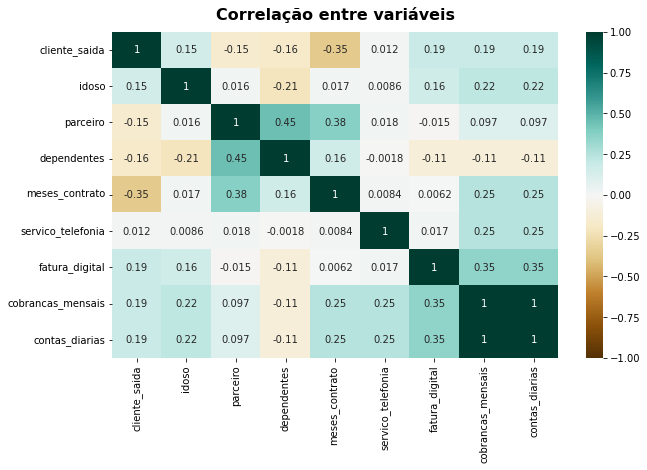

In [33]:
plt.figure(figsize = (10, 6))

correlacao = sns.heatmap(dados_extraidos.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
correlacao.set_title('Correlação entre variáveis', fontdict = {'fontsize': 16}, pad = 12, fontweight = 'bold');

O heatmap mostra uma baixa relação entre as variáveis.

**Machine Learning**

In [34]:
dados_extraidos.shape

(7043, 22)

In [35]:
dados_extraidos.head()

,cliente_id,cliente_saida,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multiplas_linhas_telefonicas,servico_internet,...,protecao_de_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,total_cobrancas,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [36]:
traducao_dic = {'Yes': 1, 
                'No': 0}

dadosmodificados = dados_extraidos[['parceiro', 'dependentes', 'servico_telefonia', 'fatura_digital', 'cliente_saida']].replace(traducao_dic)
dadosmodificados.head()

,parceiro,dependentes,servico_telefonia,fatura_digital,cliente_saida
0,1,1,1,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,1,0,1,1,1
4,1,0,1,1,1


In [38]:
dummie_dados = pd.get_dummies(dados_extraidos.drop(['parceiro', 'dependentes', 'servico_telefonia', 'fatura_digital', 'cliente_saida'], axis = 1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis = 1)
dados_final.head()

,parceiro,dependentes,servico_telefonia,fatura_digital,cliente_saida,idoso,meses_contrato,cobrancas_mensais,contas_diarias,cliente_id_0002-ORFBO,...,total_cobrancas_995.35,total_cobrancas_996.45,total_cobrancas_996.85,total_cobrancas_996.95,total_cobrancas_997.65,total_cobrancas_997.75,total_cobrancas_998.1,total_cobrancas_999.45,total_cobrancas_999.8,total_cobrancas_999.9
0,1,1,1,1,0,0,9,65.6,2.19,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,9,59.9,2.00,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,4,73.9,2.46,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,1,13,98.0,3.27,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,3,83.9,2.80,0,...,0,0,0,0,0,0,0,0,0,0


**Balanceando os dados**

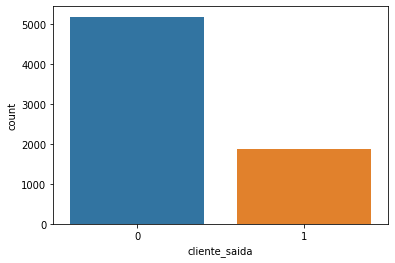

In [39]:
ax = sns.countplot(x = 'cliente_saida', data = dados_final)

In [40]:
dados_final.cliente_saida.value_counts()

0    5174
1    1869
Name: cliente_saida, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X = dados_final.drop('cliente_saida', axis = 1)
y = dados_final['cliente_saida']

In [43]:
smt = SMOTE(random_state = 123)
X, y = smt.fit_resample(X, y)

In [45]:
dados_final = pd.concat([X, y], axis=1)
dados_final.head()

,parceiro,dependentes,servico_telefonia,fatura_digital,idoso,meses_contrato,cobrancas_mensais,contas_diarias,cliente_id_0002-ORFBO,cliente_id_0003-MKNFE,...,total_cobrancas_996.45,total_cobrancas_996.85,total_cobrancas_996.95,total_cobrancas_997.65,total_cobrancas_997.75,total_cobrancas_998.1,total_cobrancas_999.45,total_cobrancas_999.8,total_cobrancas_999.9,cliente_saida
0,1,1,1,1,0,9,65.6,2.19,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,9,59.9,2.00,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,4,73.9,2.46,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,1,13,98.0,3.27,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,1,1,3,83.9,2.80,0,0,...,0,0,0,0,0,0,0,0,0,1


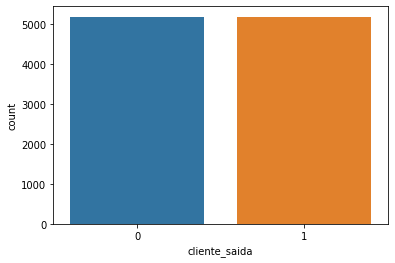

In [46]:
ax = sns.countplot(x = 'cliente_saida', data = dados_final)

In [48]:
dados_final.cliente_saida.value_counts()

0    5174
1    5174
Name: cliente_saida, dtype: int64

**Método probabilístico - Modelo Bernoulli Naive Bayes**

In [49]:
X = dados_final.drop('cliente_saida', axis = 1)
y = dados_final['cliente_saida']

In [59]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [53]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26905258,  1.88589051,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       ...,
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089]])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state = 123)

In [56]:
from sklearn.naive_bayes import BernoulliNB

In [57]:
bnb = BernoulliNB(binarize = -0.44)

In [60]:
np.median(X_treino)

-0.00983088861338443

In [61]:
X_treino

array([[-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       ...,
       [ 1.26905258, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089],
       [-0.78798942, -0.53025348,  0.33157677, ..., -0.00983089,
        -0.00983089, -0.00983089]])

In [62]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    1
       ..
9785    1
7763    1
5218    1
1346    1
3582    0
Name: cliente_saida, Length: 7243, dtype: int64

In [63]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [66]:
predito_BNb = bnb.predict(X_teste)
predito_BNb

array([1, 1, 0, ..., 1, 1, 1])

**Método Simbólico - Modelo Árvore de Decisão**

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [69]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [70]:
dtc.feature_importances_

array([0.01286471, 0.00810144, 0.00217123, ..., 0.        , 0.        ,
       0.00021907])

In [71]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 0, 1])

**Validação dos modelos**

In [72]:
from sklearn.metrics import confusion_matrix

In [74]:
print(confusion_matrix(y_teste, predito_BNb))

[[1020  548]
 [ 231 1306]]


In [75]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1261  307]
 [ 252 1285]]


**Acurácia**

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print(accuracy_score(y_teste, predito_BNb))

0.7491143317230273


In [78]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8199677938808374


**Precisão**

Cálculo de quantos foram classificados corretamento como positivos (TP).

In [79]:
from sklearn.metrics import precision_score

In [83]:
print(precision_score(y_teste, predito_BNb))

0.7044228694714132


In [84]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.8071608040201005


**Recall**

Cálculo do quão bom o modelo está para classificar corretamente um resultado positivo (TP).

In [86]:
from sklearn.metrics import recall_score

In [87]:
print(recall_score(y_teste, predito_BNb))

0.8497072218607677


In [88]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8360442420299284


**Melhor modelo**

In [90]:
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo Bernoulli de Naive Bayes:  0.7044228694714132
Modelo Árvore de decisão:  0.8071608040201005


O melhor modelo para esta análise é o "Árvore de decisão" por ter apresentando a maior taxa de acerto.